In [ ]:
## fake_transactional_data_24.csv

In [ ]:
## Libraries needed

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')

In [4]:
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [5]:
data.isnull()  ##missing values

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [6]:
data.isnull().sum()

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

In [8]:
data.shape

(10148280, 4)

In [9]:
## statistical data
data.describe()

,from_totally_fake_account,monopoly_money_amount
count,1.014828e+07,1.014828e+07
mean,5.080502e+04,1.839348e+01
std,2.893710e+04,8.612323e+01
min,1.000000e+03,1.450000e+00
25%,2.530400e+04,2.650000e+00
50%,5.078100e+04,6.000000e+00
75%,7.563300e+04,1.200000e+01
max,1.009880e+05,1.995000e+03


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [12]:
data.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

In [11]:
data.nunique() ##any unique values??

from_totally_fake_account         8142
monopoly_money_amount             5236
to_randomly_generated_account    14300
not_happened_yet_date              364
dtype: int64

In [28]:
##Converting 'not_happened_yet_date' column to datetime data type.to perform time-based analyses & temporal patterns.

data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')
data['not_happened_yet_date']     ##

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275          NaT
10148276          NaT
10148277          NaT
10148278          NaT
10148279          NaT
Name: not_happened_yet_date, Length: 10148280, dtype: datetime64[ns]

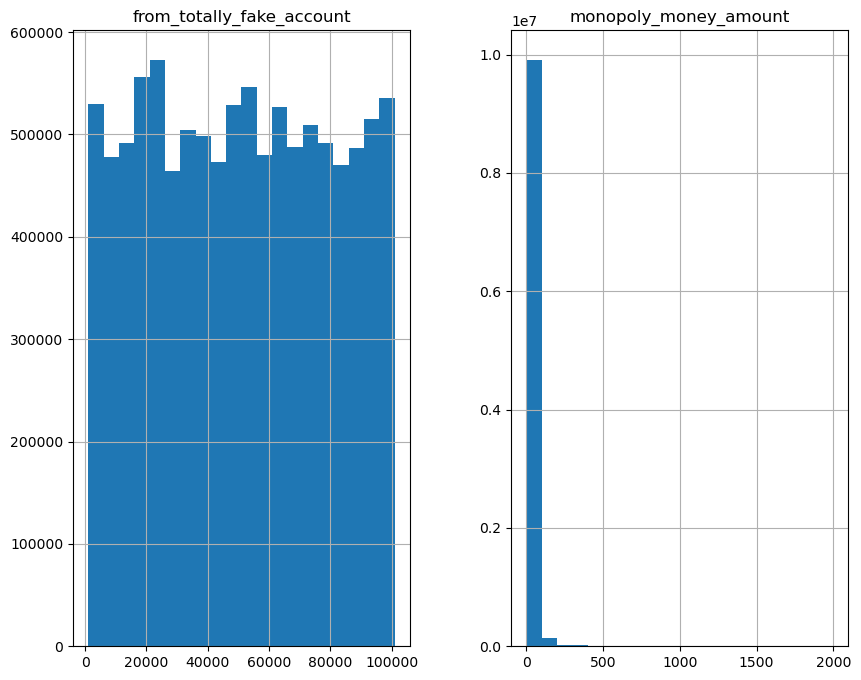

In [17]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

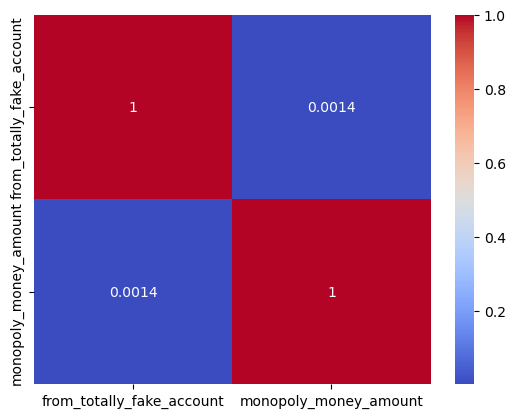

In [21]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


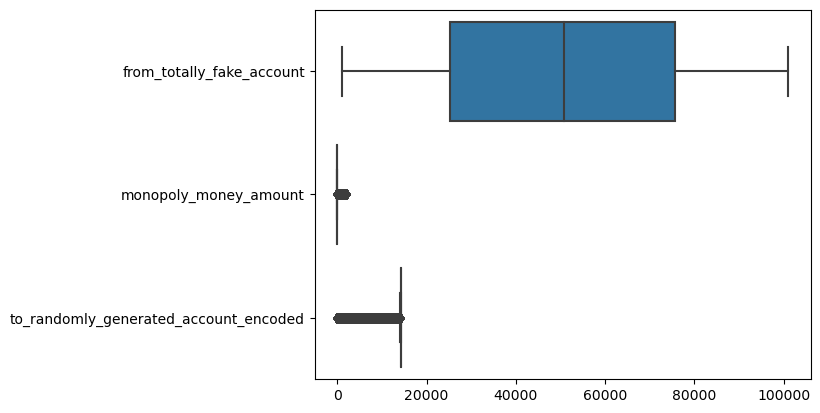

In [23]:
# Box plots 
sns.boxplot(data=data, orient='h')
plt.show()

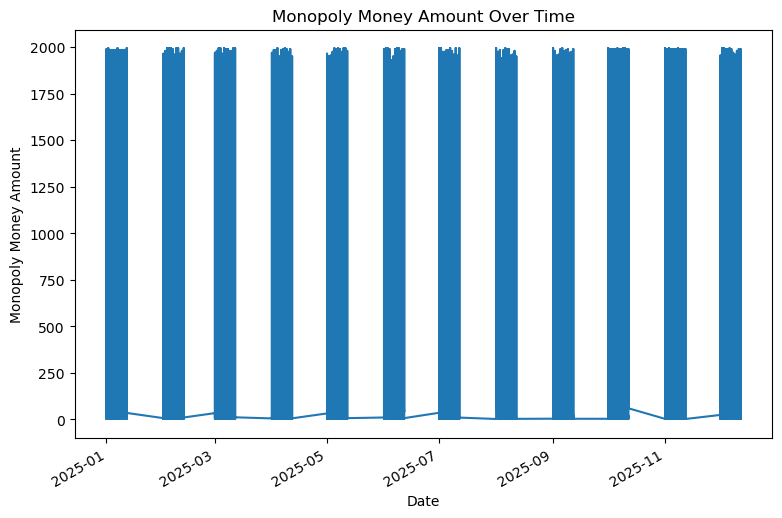

In [26]:
# Convert the 'not_happened_yet_date' column to datetime with 'coerce' error handling
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], errors='coerce')

# Time series plot
plt.figure(figsize=(9, 6))
data.set_index('not_happened_yet_date')['monopoly_money_amount'].plot()
plt.title('Monopoly Money Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()

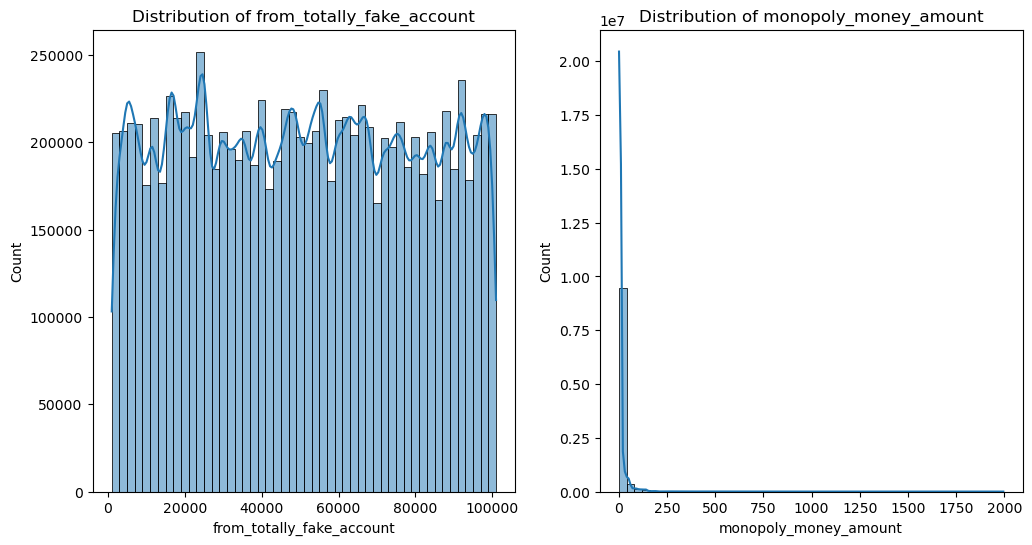

In [29]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['from_totally_fake_account'], bins=50, kde=True)
plt.title('Distribution of from_totally_fake_account')

plt.subplot(1, 2, 2)
sns.histplot(data['monopoly_money_amount'], bins=50, kde=True)
plt.title('Distribution of monopoly_money_amount')

plt.show()
